In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/inception-resnet-v2/tensorflow2/classification/2/saved_model.pb
/kaggle/input/inception-resnet-v2/tensorflow2/classification/2/variables/variables.index
/kaggle/input/inception-resnet-v2/tensorflow2/classification/2/variables/variables.data-00000-of-00001
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0324.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0874.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0360.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0551.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0590.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0857.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0374.jpg
/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0928.jpg
/kaggle/input/forest-fire-dataset/Forest F

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os

In [35]:
import tensorflow as tf

In [36]:
def process_image(image_path, IMG_SIZE=224):

    image = tf.io.read_file(image_path)
    image = tf.io.decode_image(image, channels=3, expand_animations= False)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    return image

In [37]:
images_loc = []
labels = []
for i in os.listdir("/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire"):
    images_loc.append(process_image("/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire"+"/"+i))
    labels.append(0)
for i in os.listdir("/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/fire"):
    images_loc.append(process_image("/kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/fire"+"/"+i))
    labels.append(1)

In [38]:
classnames = np.array(["nofire", "fire"])

In [39]:
images_loc = np.array(images_loc)
labels = np.array(labels)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_testy, y_train, y_testy = train_test_split(images_loc, labels, test_size = 0.3)

In [41]:
X_val, X_test, y_val, y_test = train_test_split(X_testy, y_testy, test_size = 0.5)

In [42]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(classnames[labels[i]])
        plt.axis("off")

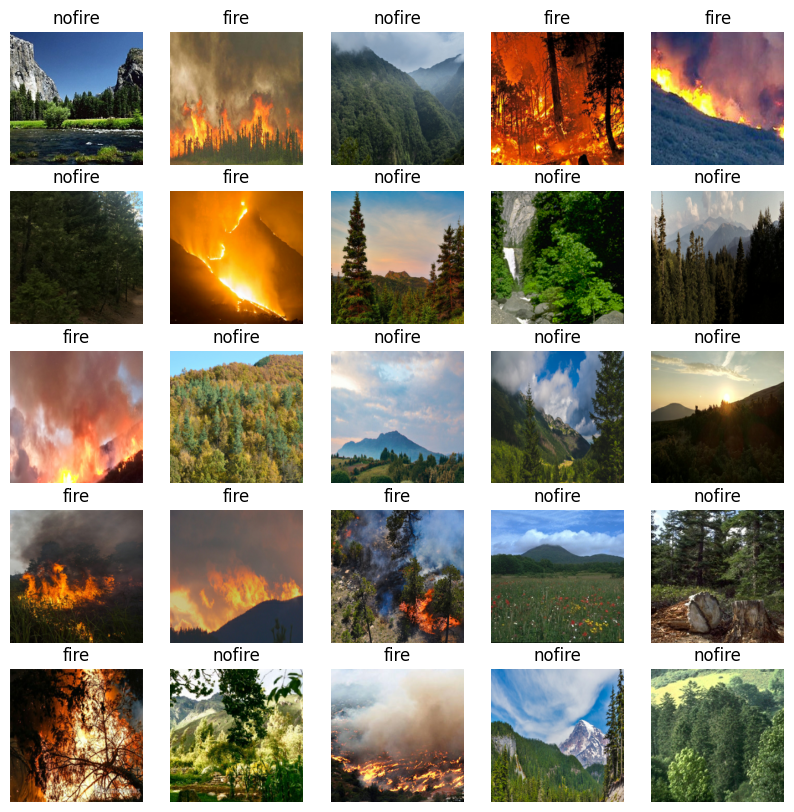

In [43]:
show_25_images(X_train, y_train)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

input_shape = (224, 224, 3)  
num_classes = 6

model_cnn = Sequential()

model_cnn = Sequential()
   
model_cnn.add(Conv2D(32,(3,3), padding='same', input_shape=input_shape,activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2))) 
model_cnn.add(BatchNormalization())
model_cnn.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2))) 
model_cnn.add(BatchNormalization())
model_cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2))) 
model_cnn.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D(pool_size=(2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(64,activation='relu'))
model_cnn.add(Dense(num_classes,activation='softmax'))

model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_cnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             

 Total params: 363,238 (1.39 MB)

 Trainable params: 362,214 (1.38 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [45]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',  # Use the .keras extension
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)


In [46]:
model_cnn.fit(x = X_train, 
          y = y_train,
          epochs=20,
          validation_data = (X_val, y_val),
          batch_size = 32, 
          callbacks=[checkpoint_callback])

Epoch 1/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8135 - loss: 0.6707
Epoch 1: val_accuracy improved from -inf to 0.52193, saving model to best_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.8159 - loss: 0.6612 - val_accuracy: 0.5219 - val_loss: 1.1165
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9550 - loss: 0.0918
Epoch 2: val_accuracy did not improve from 0.52193
34/34 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.9551 - loss: 0.0918 - val_accuracy: 0.5219 - val_loss: 0.8605
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9800 - loss: 0.0638
Epoch 3: val_accuracy improved from 0.52193 to 0.74123, saving model to best_model.keras
34/34 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.9800 - loss: 0.0641 - val_accuracy: 0.7412 - val_loss: 0.6365
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9664 - loss: 0.0915
Epoch 4: val_accuracy did not improve from 0.74123
34/34 ━━━━━━━━━━━━━━━━━━━━ 88s 3s/step - accu

In [47]:
model_cnn.evaluate(X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 440ms/step - accuracy: 0.9809 - loss: 0.0790


[0.11186468601226807, 0.9824561476707458]

Enter the image path:  /kaggle/input/forest-fire-dataset/Forest Fire Dataset/Testing/fire_0289.jpg


Processed image shape: (224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


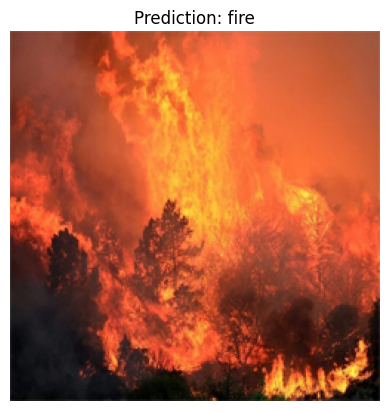

In [61]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Function to process the image using TensorFlow
def process_image(image_path, IMG_SIZE=224):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_image(image, channels=3, expand_animations=False)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    return image

img_path = input("Enter the image path: ")

# Ensure the path is valid and the file exists
if not os.path.exists(img_path):
    raise FileNotFoundError(f"The specified image path does not exist: {img_path}")

# Process the image using TensorFlow functions
image = process_image(img_path)

# Check if the image was processed successfully
if image is None or tf.reduce_sum(image) == 0:
    raise ValueError("The image could not be processed. Please check the image file and path.")
else:
    print("Processed image shape:", image.shape)

# Prepare the image for prediction
image = np.expand_dims(image, axis=0)

# Make the prediction
p = np.argmax(model_cnn.predict(image))

# Display the image and prediction
a = tf.io.read_file(img_path)
a = tf.image.decode_image(a, channels=3, expand_animations=False)
plt.title(f"Prediction: {classnames[p]}")
plt.imshow(a)
plt.axis('off')
plt.show()


Enter the image path:  /kaggle/input/forest-fire-dataset/Forest Fire Dataset/Training/nofire/nofire_0007.jpg


Processed image shape: (224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


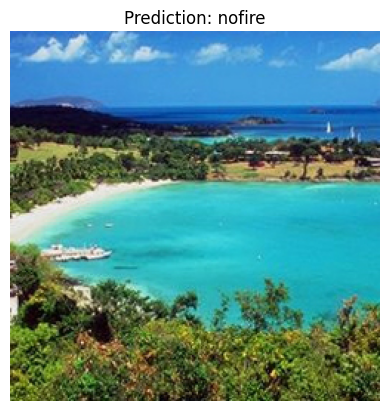

In [63]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Function to process the image using TensorFlow
def process_image(image_path, IMG_SIZE=224):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_image(image, channels=3, expand_animations=False)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    return image

img_path = input("Enter the image path: ")

# Ensure the path is valid and the file exists
if not os.path.exists(img_path):
    raise FileNotFoundError(f"The specified image path does not exist: {img_path}")

# Process the image using TensorFlow functions
image = process_image(img_path)

# Check if the image was processed successfully
if image is None or tf.reduce_sum(image) == 0:
    raise ValueError("The image could not be processed. Please check the image file and path.")
else:
    print("Processed image shape:", image.shape)

# Prepare the image for prediction
image = np.expand_dims(image, axis=0)

# Make the prediction
p = np.argmax(model_cnn.predict(image))

# Display the image and prediction
a = tf.io.read_file(img_path)
a = tf.image.decode_image(a, channels=3, expand_animations=False)
plt.title(f"Prediction: {classnames[p]}")
plt.imshow(a)
plt.axis('off')
plt.show()
